In [1]:
import torch
import numpy as np
from Networks.mesh2mesh import *
from Networks.rgbd2mesh import RGBD2Mesh
import trimesh
from Networks.obj2pointcloud import *

In [2]:
numpoints = 11928

PNE = PointNetEncoder(numpoints=numpoints)
PND = PointNetDecoder(numpoints=numpoints)
input = torch.rand(2,3,numpoints)
print(input.shape)
output = PNE(input)
print(output.shape)
recon = PND(output)
print(recon.shape)

torch.Size([2, 3, 11928])
torch.Size([2, 1024])
torch.Size([2, 3, 11928])


In [3]:
depthIntrinsics = np.array([[711.1111,0.0,255.5],[0.0,711.1111,255.5],[0,0,1]])
depthExtrinsics = np.array([[0.6859, 0.7277, 0.0, -0.03], [0.324, -0.3054, -0.8954, -0.054], [-0.6516, 0.6142, -0.4453, 1.9951], [0.0, 0.0, 0.0, 1.0]])
import OpenEXR
depthimg = OpenEXR.InputFile("./objects/000021_depth0001.exr").channel('R')
#depthimg = OpenEXR.InputFile("./Networks/depth0001.exr").channel('R')
print(type(depthimg))
depth = np.frombuffer(depthimg, dtype=np.float32)

print(depth)
print(depth.shape)
rgb2mesh = RGBD2Mesh(depth, 512,512, depthIntrinsics, depthExtrinsics)
pcd = rgb2mesh.tomesh()

<class 'bytes'>
[65504. 65504. 65504. ... 65504. 65504. 65504.]
(262144,)


In [4]:
file = open('./suzanne.obj', 'r')
suzanne = trimesh.exchange.obj.load_obj(file)
suzanne

unable to load materials from: suzanne.mtl
Traceback (most recent call last):
  File "/home/wuha/anaconda3/lib/python3.8/site-packages/trimesh/exchange/obj.py", line 79, in load_obj
    material_kwargs = parse_mtl(resolver[mtl_path],
TypeError: 'NoneType' object is not subscriptable


{'vertices': array([[ 0.765625,  0.4375  ,  0.164062],
        [ 0.765625,  0.4375  ,  0.164062],
        [ 0.765625,  0.4375  ,  0.164062],
        ...,
        [-0.382812, -0.859375,  0.382812],
        [-0.382812, -0.859375,  0.382812],
        [-0.382812, -0.859375,  0.382812]]),
 'faces': array([[ 153,    0,   10],
        [  10,  145,  153],
        [  12,    7,  157],
        ...,
        [1952, 1500, 1218],
        [1955, 1228, 1222],
        [1222, 1506, 1955]]),
 'visual': <trimesh.visual.texture.TextureVisuals at 0x7f87ab4bb4c0>}

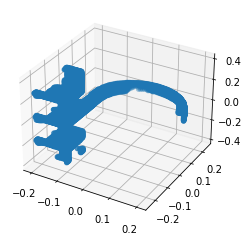

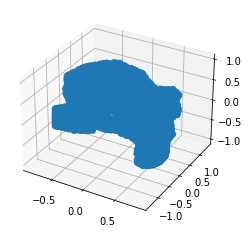

In [5]:
suzanne['vertices'].shape
suzanne_pcd = trimesh.points.PointCloud(suzanne['vertices'])
suzanne_pcd.show()
trimesh.points.plot_points(pcd)

pcd_full = sample_point_cloud(suzanne['vertices'], suzanne['faces'], 10000)
trimesh.points.plot_points(pcd_full)
pcd_full.shape

export_pointcloud_to_obj('./suzanne_pcd.obj', pcd_full)



In [24]:
t = torch.tensor(pcd).view(3,-1)
t.shape

torch.Size([3, 11928])

In [25]:
t = t[None,:,:]

In [29]:
t2 = torch.cat((t,t),dim=0)
t2.shape

torch.Size([2, 3, 11928])

In [27]:
EPOCH=10

for epoch in range(EPOCH):
    


torch.Size([1, 3, 11928])